#Importing Libraries

In [1]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
#importing libraries
import pandas as pd
import os
import logging
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
from botocore.exceptions import ClientError
from KEYS import ACCESS_KEY, SECRET_ACCESS_KEY

In [ ]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_ACCESS_KEY
    )


#Read CSV

In [ ]:
bucket = "project1-jumplus"
file1 = "charcters_stats.csv"
s3_client.download_file(bucket, file1, file1)
#download_file(file1, bucket=bucket, object_name=file1)

In [ ]:
#2. Reading csv file
df = pd.read_csv("charcters_stats.csv")
df = df.dropna()
#Show first records from csv
df.head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233


In [ ]:
# showing each column's name.
print(df.columns.tolist())
#4. Need to show number of rows and columns of this dataset
print("Number of rows: ", len(df))
print("Number of columns: ", len(df.columns))


['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total']
Number of rows:  608
Number of columns:  9


In [ ]:
# 5. You need to find the values of alignment,can use value_counts()
df["Alignment"].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [ ]:
# 6. Find out only good alignment holders superheroes
super_heroes = df[df["Alignment"] == "good"]
# 7. Show first five records which you found in point 6
super_heroes.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [ ]:
# 8. Show top five records having top speed of heroes of good alignment
top_speed = super_heroes.nlargest(5,"Speed")

top_speed

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
85,Black Bolt,good,75,67,100,84,100,56,482
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348
232,Flash IV,good,63,10,100,32,59,48,312


In [ ]:
# 9. Show 5 records of super heroes who have maximum power of good alignment
max_power = super_heroes.nlargest(5,"Power")

max_power

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


In [ ]:
# 10. Find out how many super heroes are there with power 100 of good alignment
heroes100 = super_heroes[super_heroes["Power"] == 100]
heroes100

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


In [ ]:
# 11. Shape them what you got in point 10
heroes100.shape

(33, 9)

In [ ]:
# 12. Show all records from point 10
heroes100

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


In [ ]:
# 13. Retrieve total of first five records of max power of good alignment super heroes
heroes5 = heroes100.head(5)
Total = heroes5['Total'].sum()
print(f"Total of First five Records with Max power of Good Alignment Super Heroes: {Total}")


Total of First five Records with Max power of Good Alignment Super Heroes: 2136


Text(0, 0.5, 'Total')

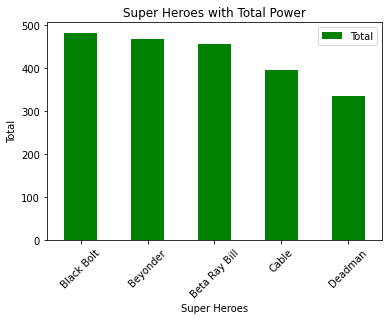

In [ ]:
# 14. Draw a bar plot of all super heroes who are having good alignment and max power of 
# top five only , take same object of point 13 , show name and total in plot with green bars

top5 = heroes5.sort_values(by="Total", ascending=0)[:5]
top5.plot.bar(x='Name', y='Total', color="green")

plt.title("Super Heroes with Total Power")
plt.xlabel("Super Heroes")
plt.xticks(rotation=45)
plt.ylabel("Total")


In [ ]:
# 15. Extract villains having bad alignment
villains = df[df["Alignment"] == "bad"]
villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...
586,Warp,bad,38,10,23,28,63,50,212
590,Weapon XI,bad,1,1,1,1,0,1,5
593,Willis Stryker,bad,38,16,23,28,41,60,206
605,Yellow Claw,bad,1,1,1,1,0,1,5


In [ ]:
# 16. Show first five records of point 15
villains.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


In [ ]:
# 17. Show top five fastest super villains in terms of super speed
fastest_villains = villains.nlargest(5,"Speed")

fastest_villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
610,Zoom,bad,50,10,100,28,72,28,288
242,General Zod,bad,94,100,96,100,94,95,579


In [ ]:
# 18. Top five super villains in terms of intelligence
intellegent_villains = villains.nlargest(5,"Intelligence")

intellegent_villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
29,Apocalypse,bad,100,100,33,100,100,60,493
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429
315,Joker,bad,100,10,12,56,22,90,290


In [ ]:
# 19. Show who is most dangerous super villain after calculating their total (top 5 only)
dangerous_villains = villains.sort_values(by="Total", ascending=False).head()
dangerous_villains
# Total = dangerous_villains['Total'].sum()
# print(f"Total of First five Records with most dangerous super villain after calculating their total: {Total}")

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


In [ ]:
df[df["Alignment"] == "good"]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


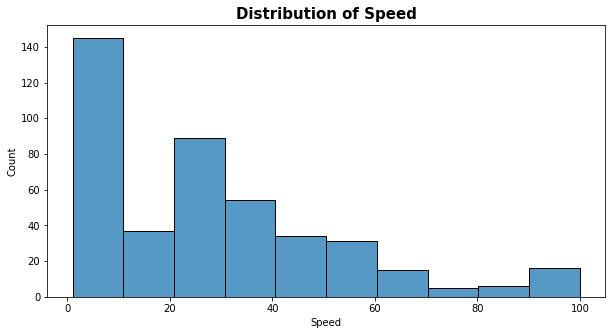

In [ ]:
# 20. Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in
# histogram for only good alignment super heroes ,title should be "distribution of
# speed" , xlabel should be "speed"

plt.figure(figsize= (10,5))
super_heroes = df[df["Alignment"] == "good"]
sns.histplot(data=super_heroes, x="Speed")
plt.title("Distribution of Speed", fontsize = 15, weight = "bold");

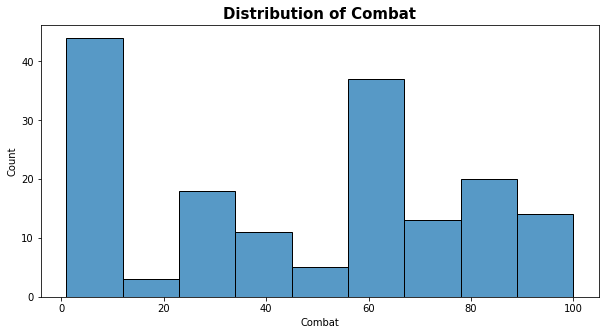

In [ ]:
# 21. Draw a histogram for combat of super villains having fig size 10,5 , provide combat in
# histogram for only bad alignment super heroes ,title should be "distribution of
# combat" , xlabel should be "combat"

plt.figure(figsize= (10,5))
villains = df[df["Alignment"] == "bad"]
sns.histplot(data=villains, x="Combat")
plt.title("Distribution of Combat", fontsize = 15, weight = "bold");


#Extensions(22-26)

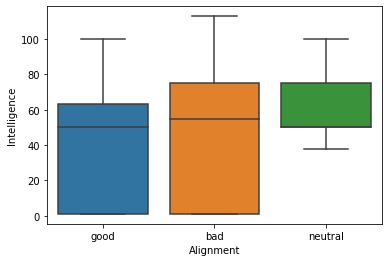

In [ ]:
sns.boxplot(data=df, x='Alignment', y='Intelligence');

- The average intelligence score for individuals with a good alignment falls within the range of 60-65.

- Individuals with a bad alignment have an average intelligence score ranging between 65-70.

- Those with a neutral alignment have an average intelligence score also ranging between 65-70.

- The skewness in the box plot can be attributed to the larger number of records with intelligence scores below 20. Shown below 

<Axes: xlabel='Intelligence', ylabel='Density'>

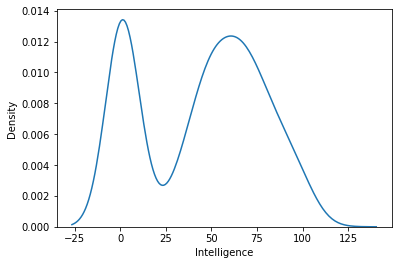

In [ ]:
sns.kdeplot(data=df, x="Intelligence")

#23 function for barplot(superpowers)

In [ ]:
def  create_bar(col):
    plt.figure(figsize = (10,6))
    temp_df = df.groupby("Alignment")[col].mean().round(decimals=2).reset_index()
    ax = sns.barplot(
        data = temp_df,
        x = "Alignment",
        y = col,
        palette = ["#941A00", "#439429", "#1E38AD"]
    )
    plt.title(f"{col} with respect to Alignment", fontsize =  15, weight = "bold");
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

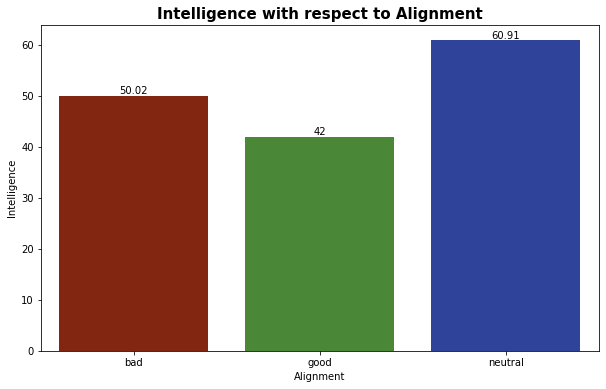

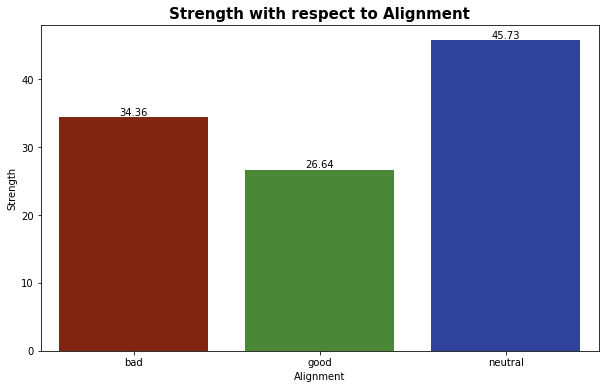

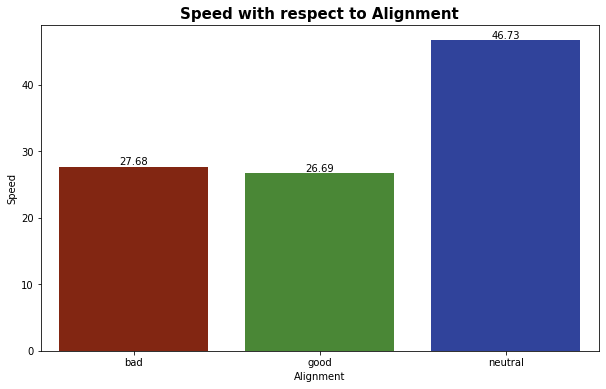

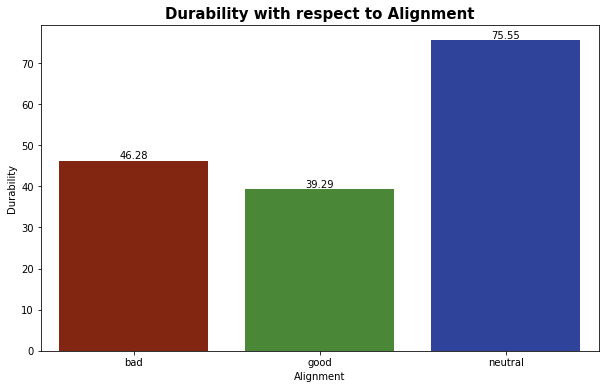

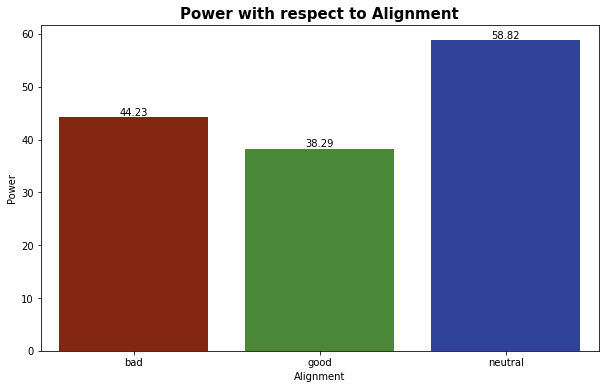

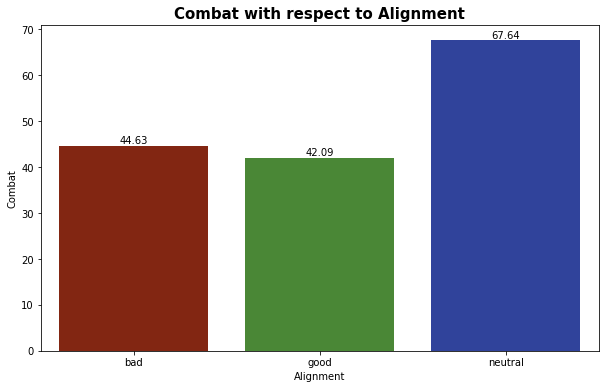

In [ ]:
cols = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
for col in cols:
    create_bar(col)

In [ ]:
# df.groupby("Alignment")["Intelligence"].mean().reset_index()

In [ ]:
good = df[df["Alignment"]=="good"].reset_index(drop = True)
bad = df[df["Alignment"]=="bad"].reset_index(drop = True)
# df[df["Alignment"]=="bad"]

In [ ]:
# good.iloc[good["Total"].sort_values(ascending = False)[:10].index]

<ipython-input-76-8d467536ab96>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bad_mean = bad.iloc[bad["Total"].sort_values(ascending = False)[:100].index].mean()
<ipython-input-76-8d467536ab96>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  good_mean = good.iloc[good["Total"].sort_values(ascending = False)[:100].index].mean()


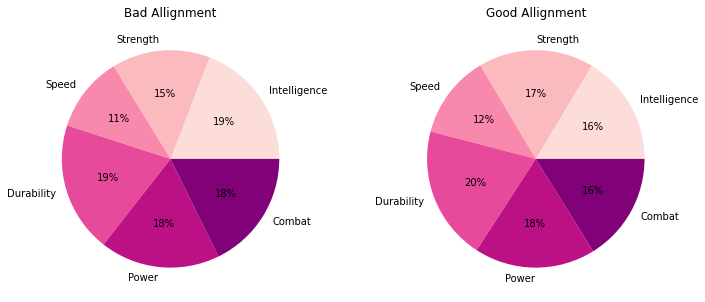

In [ ]:
fig, ax  = plt.subplots(1,2, figsize = (12, 5))
bad_mean = bad.iloc[bad["Total"].sort_values(ascending = False)[:100].index].mean()
bad_mean.drop("Total", inplace = True)

#define Seaborn color palette to use
colors = sns.color_palette('RdPu')[0:6]

ax[0].pie(
    x = bad_mean.values,
    labels = bad_mean.index,
     autopct='%.0f%%',
    colors = colors
);
ax[0].title.set_text("Bad Allignment")


good_mean = good.iloc[good["Total"].sort_values(ascending = False)[:100].index].mean()
good_mean.drop("Total", inplace = True)

#define Seaborn color palette to use
colors = sns.color_palette('RdPu')[0:6]

ax[1].pie(
    x = good_mean.values,
    labels = good_mean.index,
     autopct='%.0f%%',
    colors = colors
);
ax[1].title.set_text("Good Allignment")

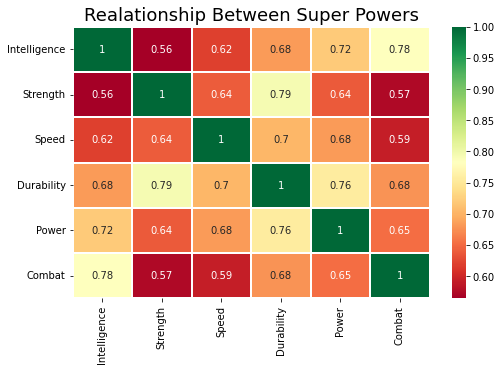

In [ ]:
ax = plt.axes()
corr = df.drop("Total",axis = 1).corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1, ax = ax)#data.corr()-->correlation matrix
ax.set_title("Realationship Between Super Powers", fontsize = 18)
fig=plt.gcf()
fig.set_size_inches(8,5)

- Upon examining the Heatmap, I noticed correlations among the superpowers as follows:

    - There is a minor negative correlation between "Strength" and both "Combat" and "Strength".
    - "Speed" shows a slight negative correlation with "Combat".
    - "Combat" exhibits a strong correlation with "Intelligence".
    - "Durability" displays a high correlation with "Strength".

#Machine Learning

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, confusion_matrix

In [ ]:
df["Alignment"].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

- It appears that my Alignment classes are imbalanced, which can introduce bias to my Classification model.
- In order to achieve balance, I removed the neutral class and added only 165 rows for each of the "bad" and "good" classes.

In [ ]:
good =df[(df["Alignment"]=="good")][:165]
bad = df[(df["Alignment"]=="bad")]

temp_df = pd.concat([good,bad], axis = 0)
temp_df["Alignment"].value_counts()

good    165
bad     165
Name: Alignment, dtype: int64

In [ ]:
X = temp_df.drop(["Name","Alignment"], axis = 1)
Y = temp_df["Alignment"].replace({
    "good":1,
    "bad" :-1
})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([-1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1])

In [ ]:
y_test.values

array([ 1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1])

In [ ]:
accuracy_score(y_test, y_pred)

0.6818181818181818

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.64      0.67        33
           1       0.67      0.73      0.70        33

    accuracy                           0.68        66
   macro avg       0.68      0.68      0.68        66
weighted avg       0.68      0.68      0.68        66



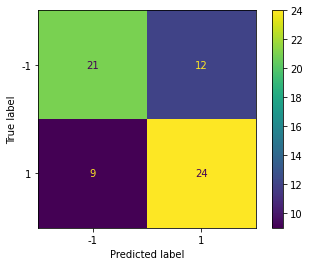

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[-1,1])
disp.plot();

- Confusion Matrix looks good and generalized as I got approxiamately equal  precision on each classes, We can further increase the accuracy of the model by  adding more rows in my training data set. 